In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import subprocess
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from mepf.experiments.postprocessing import (
    scatter_result,
    get_validity,
    scatter_result,
)

WIDTH = 7              # inches (from ICML style file)
HEIGHT = 7 / 1.618     # golden ratio

rc('font', family='serif', size=8)
usetex = not subprocess.run(['which', 'pdflatex']).returncode
rc('text', usetex=usetex)
if usetex:
    rc('text.latex', preamble=r'\usepackage{times,amsmath,amsfonts,amssymb}')



/usr/bin/pdflatex


In [41]:
res = pd.read_csv('~/code/mepf/results/stat.csv')
res

,Unnamed: 0,method,problem,constant,m,delta,delta_effective,best_mean,best_std,ratio_exp
0,0,ES,dirichlet,1.0,10,0.500000,0.000000,7.000000,2.260777,0.950000
1,1,ES,dirichlet,1.0,10,0.250000,0.000000,22.900000,23.653169,0.950000
2,2,ES,dirichlet,1.0,10,0.125000,0.013333,106.200000,157.752292,0.937500
3,3,ES,dirichlet,1.0,10,0.062500,0.000000,170.467626,237.021778,0.868750
4,4,ES,dirichlet,1.0,10,0.031250,0.000000,175.737452,238.051588,0.809375
...,...,...,...,...,...,...,...,...,...,...
2263,2263,HSE,geometric,0.3,100,0.001953,0.002738,NaN,NaN,0.998633
2264,2264,HSE,geometric,1.0,100,0.001953,0.018007,NaN,NaN,0.997852
2265,2265,HSE,geometric,3.0,100,0.001953,0.028566,NaN,NaN,0.998242
2266,2266,HSE,geometric,10.0,100,0.001953,0.106354,NaN,NaN,0.999023


In [45]:
res['okay'] = res['delta'] >= res['delta_effective']
res.loc[~res['okay'], "best_mean"] = -1
res.loc[~res['okay'], "best_std"] = -1
res = res.dropna()
res

,Unnamed: 0,method,problem,constant,m,delta,delta_effective,best_mean,best_std,ratio_exp,okay
0,0,ES,dirichlet,1.0,10,0.500000,0.000000,7.000000,2.260777,0.950000,True
1,1,ES,dirichlet,1.0,10,0.250000,0.000000,22.900000,23.653169,0.950000,True
2,2,ES,dirichlet,1.0,10,0.125000,0.013333,106.200000,157.752292,0.937500,True
3,3,ES,dirichlet,1.0,10,0.062500,0.000000,170.467626,237.021778,0.868750,True
4,4,ES,dirichlet,1.0,10,0.031250,0.000000,175.737452,238.051588,0.809375,True
...,...,...,...,...,...,...,...,...,...,...,...
2263,2263,HSE,geometric,0.3,100,0.001953,0.002738,-1.000000,-1.000000,0.998633,False
2264,2264,HSE,geometric,1.0,100,0.001953,0.018007,-1.000000,-1.000000,0.997852,False
2265,2265,HSE,geometric,3.0,100,0.001953,0.028566,-1.000000,-1.000000,0.998242,False
2266,2266,HSE,geometric,10.0,100,0.001953,0.106354,-1.000000,-1.000000,0.999023,False


In [46]:
res.groupby(['method', 'constant'])['okay'].mean()

method  constant
AS      1.0         0.779070
E       0.1         0.070707
        0.3         0.804878
        1.0         1.000000
        3.0         1.000000
        10.0        0.645833
        24.0        0.000000
ES      1.0         0.779070
HSE     0.1         0.070707
        0.3         0.837838
        1.0         0.410256
        3.0         0.229885
        10.0        0.103093
        24.0        0.122449
HTS     1.0         0.767442
SE      0.1         0.262626
        0.3         1.000000
        1.0         1.000000
        3.0         0.797872
        10.0        0.090909
        24.0        0.000000
Name: okay, dtype: float64

In [44]:
res.loc[~res['okay']]

,Unnamed: 0,method,problem,constant,m,delta,delta_effective,best_mean,best_std,ratio_exp,okay
30,30,ES,one,1.0,10,0.062500,0.087500,NaN,NaN,1.000000,False
31,31,ES,one,1.0,10,0.031250,0.053125,NaN,NaN,1.000000,False
32,32,ES,one,1.0,10,0.015625,0.017188,NaN,NaN,1.000000,False
36,36,ES,one,1.0,30,0.500000,0.600000,NaN,NaN,1.000000,False
37,37,ES,one,1.0,30,0.250000,0.325000,NaN,NaN,1.000000,False
...,...,...,...,...,...,...,...,...,...,...,...
2263,2263,HSE,geometric,0.3,100,0.001953,0.002738,NaN,NaN,0.998633,False
2264,2264,HSE,geometric,1.0,100,0.001953,0.018007,NaN,NaN,0.997852,False
2265,2265,HSE,geometric,3.0,100,0.001953,0.028566,NaN,NaN,0.998242,False
2266,2266,HSE,geometric,10.0,100,0.001953,0.106354,NaN,NaN,0.999023,False


,method,problem,constant,delta,delta_effective,okay
0,ES,dirichlet,1.0,0.500000,0.000000,True
1,ES,dirichlet,1.0,0.250000,0.000000,True
2,ES,dirichlet,1.0,0.125000,0.013333,True
3,ES,dirichlet,1.0,0.062500,0.000000,True
4,ES,dirichlet,1.0,0.031250,0.000000,True
...,...,...,...,...,...,...
4514,HSE,geometric,1.0,0.015625,0.000000,True
4515,HSE,geometric,3.0,0.015625,0.000000,True
4519,HSE,geometric,0.3,0.007812,0.000000,True
4525,HSE,geometric,0.3,0.003906,0.001172,True


In [27]:
2 ** (-9)

0.001953125

In [38]:
methods = ['ES', 'AS', 'TS', 'E', 'SE']
constants = [.3, 1]

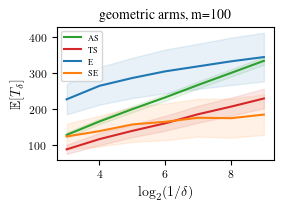

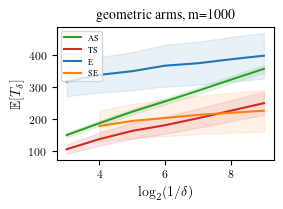

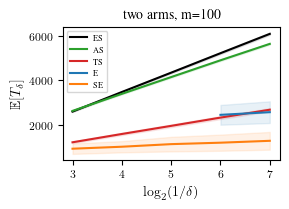

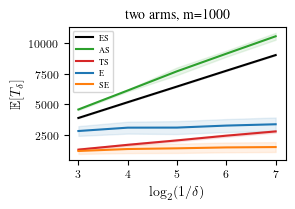

In [44]:
problem = 'geometric'
m = 1000

for problem in ['geometric', 'two']:
    for i, m in enumerate([100, 1000]):

        ind = res['problem'] == problem
        ind &= res['m'] == m

        leg = []
        fig, ax = plt.subplots(1, 1, figsize=(.4 * WIDTH, .4 * HEIGHT))
        for method in methods:
            met_ind = ind & (res['method'] == method)
            if method == 'ES':
                color = 'black'
                if problem == 'geometric':
                    continue
            elif method == 'E':
                color = 'C0'
            elif method == 'SE':
                color = 'C1'
            elif method == 'AS':
                color = 'C2'
            elif method == 'TS':
                color = 'C3'
            for c in constants:
                if method not in ['E', 'SE'] and c != 1:
                    continue
                if method == 'SE' and c == 1:
                    continue
                if method == 'E' and c == .3:
                    continue
                tmp = res[met_ind & (res['constant'] == c)]

                start = 2
                a, = ax.plot(np.arange(len(tmp))[start:] + 1, tmp['best_mean'].values[start:], label=f'{method}', color=color)
                ax.fill_between(np.arange(len(tmp))[start:] + 1, tmp['best_mean'].values[start:] - .5 * tmp['best_std'].values[start:], tmp['best_mean'].values[start:] + .5 * tmp['best_std'].values[start:], alpha=.1, color=color)
                # a, = ax.plot(np.log(tmp['delta_effective'] / tmp['delta']).values, alpha=min(1, 5*c), color=color)
                leg.append(a)

        # ax.legend(leg, ['ES-AS-TS', 'E, c=0.1', 'E, c=0.3', 'SE, c=0.1', 'SE, c=0.3'], fontsize=6)
        ax.legend(fontsize=6)
        ax.set_xlabel(r'$\log_2(1/\delta)$', fontsize=10)
        ax.set_ylabel(r'$\mathbb{E}[T_\delta]$', fontsize=10)
        ax.set_title(f'{problem} arms, m={m}', fontsize=10)
        fig.savefig(f'new_{problem}_{m}.pdf', bbox_inches='tight', pad_inches=0)

In [49]:
problem = 'geometric'
m = 100

ind = res['problem'] == problem
ind &= res['m'] == m

leg = []
fig, ax = plt.subplots(1, 1, figsize=(.4 * WIDTH, .4 * HEIGHT))
for method in ['ES', 'E', 'SE']:
    met_ind = ind & (res['method'] == method)
    for c in constants:
        if method not in ['E', 'SE'] and c != 1:
            continue
        tmp = res[met_ind & (res['constant'] == c)]

        a, = ax.plot(np.log(tmp['delta_effective'] / tmp['delta']).values)
        leg.append(a)

ax.legend(leg, ['ES-AS-TS', 'E, c=0.1', 'E, c=0.3', 'E, c=1', 'SE, c=0.1', 'SE, c=0.3', 'SE, c=1'], fontsize=6)
ax.set_xlabel(r'$\log_2(1/\delta)$', fontsize=10)
ax.set_ylabel(r'$\log_2(\delta_e / \delta)$', fontsize=10)
fig.savefig('delta_g_m100.pdf', bbox_inches='tight', pad_inches=0)

0

/home/vivc/Code/conda/envs/dev/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


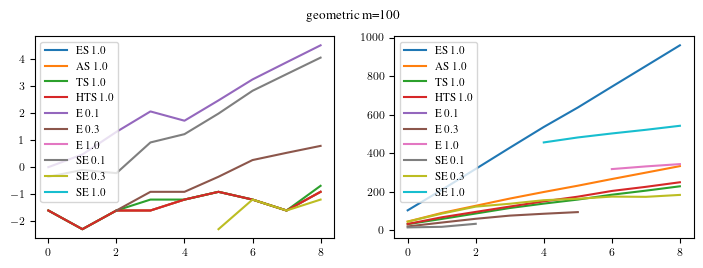

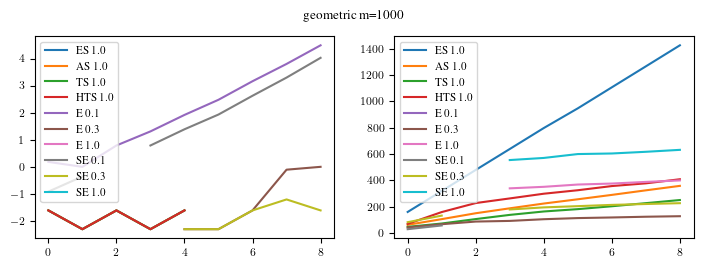

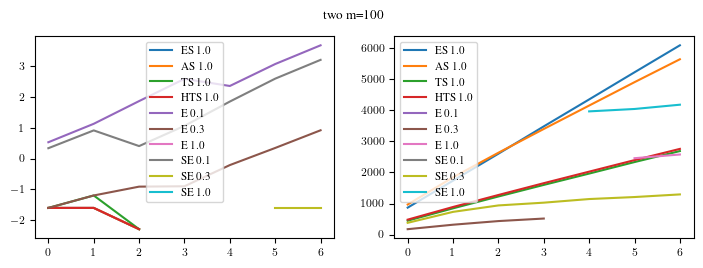

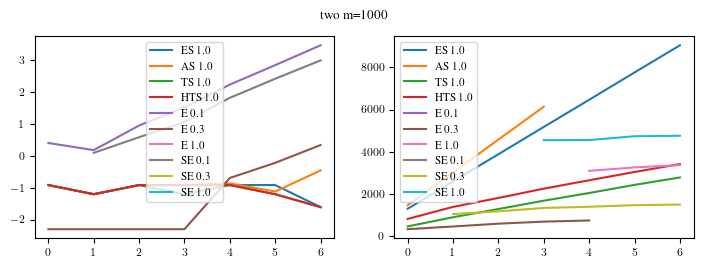

In [45]:
problem = 'geometric'
m = 100

for problem in ['geometric', 'two']:
    for m in [100, 1000]:
        ind = res['problem'] == problem
        ind &= res['m'] == m

        fig, ax = plt.subplots(1, 2, figsize=(WIDTH, .5 * HEIGHT))
        for method in methods:
            met_ind = ind & (res['method'] == method)
            for c in constants:
                if method not in ['E', 'SE'] and c != 1:
                    continue
                tmp = res[met_ind & (res['constant'] == c)]

                ax[0].plot(np.log(tmp['delta_effective'] / tmp['delta']).values, label=f'{method} {c}')
                ax[1].plot(tmp['best_mean'].values, label=f'{method} {c}')
        ax[0].legend()
        ax[1].legend()
        fig.suptitle(f'{problem} m={m}')

In [33]:
tmp['delta']

,method,problem,constant,m,delta,delta_effective,best_mean,best_std,ratio_exp
461,SE,geometric,1.0,100,0.500000,0.0,NaN,NaN,1.0
464,SE,geometric,1.0,100,0.250000,0.0,NaN,NaN,1.0
467,SE,geometric,1.0,100,0.125000,0.0,NaN,NaN,1.0
470,SE,geometric,1.0,100,0.062500,0.0,NaN,NaN,1.0
473,SE,geometric,1.0,100,0.031250,0.0,456.458065,189.459912,1.0
476,SE,geometric,1.0,100,0.015625,0.0,482.187302,200.901252,1.0
479,SE,geometric,1.0,100,0.007812,0.0,502.866142,206.726799,1.0
482,SE,geometric,1.0,100,0.003906,0.0,521.826275,212.273407,1.0
485,SE,geometric,1.0,100,0.001953,0.0,542.633659,220.668298,1.0


In [15]:
res[ind & (res['method'] == 'SE') & (res['constant'] == 1)]

,method,problem,constant,m,delta,delta_effective,best_mean,best_std,ratio_exp
461,SE,geometric,1.0,100,0.500000,0.0,NaN,NaN,1.0
464,SE,geometric,1.0,100,0.250000,0.0,NaN,NaN,1.0
467,SE,geometric,1.0,100,0.125000,0.0,NaN,NaN,1.0
470,SE,geometric,1.0,100,0.062500,0.0,NaN,NaN,1.0
473,SE,geometric,1.0,100,0.031250,0.0,456.458065,189.459912,1.0
476,SE,geometric,1.0,100,0.015625,0.0,482.187302,200.901252,1.0
479,SE,geometric,1.0,100,0.007812,0.0,502.866142,206.726799,1.0
482,SE,geometric,1.0,100,0.003906,0.0,521.826275,212.273407,1.0
485,SE,geometric,1.0,100,0.001953,0.0,542.633659,220.668298,1.0


In [16]:
tmp

,method,problem,constant,m,delta,delta_effective,best_mean,best_std,ratio_exp
